In [1]:
import data as d
import matplotlib as plt


from conditional_flow import CondFlow

%matplotlib inline
plt.rcParams.update({'font.size': 17})

/home/ischuster/software/python/distributions/distributions/linalg.py:35: UserWarning: warning: caught this exception:module 'numpy.core' has no attribute '_dotblas'
  warnings.warn("warning: caught this exception:" + str(e))


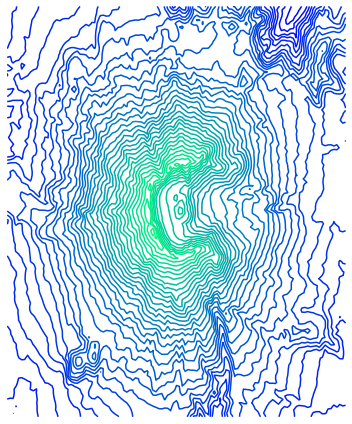

In [2]:
m = d.Mountain()
m.plot_contour()
coord = np.hstack((m.data['x'].reshape(-1, 1), m.data['y'].reshape(-1, 1)))
elev = m.data['z'].reshape(-1, 1)

In [3]:
perm = np.random.permutation(len(coord))
coord_perm, elev_perm = coord[perm], elev[perm]
cutoff = int(len(coord) * 0.8)
train_inp, train_out = coord[perm][:cutoff,:], elev[perm][:cutoff,:]
test_inp, test_out = coord[perm][cutoff:,:], elev[perm][cutoff:,:]

inp_mean, inp_sd = train_inp.mean(0), train_inp.std(0)
out_mean, out_sd = train_out.mean(0), train_out.std(0)
train_inp_z, train_out_z = (train_inp - inp_mean) / inp_sd, (train_out - out_mean) / out_sd
test_inp_z, test_out_z = (test_inp - inp_mean) / inp_sd, (test_out - out_mean) / out_sd

In [51]:
maf = CondFlow.optimized_cde(train_inp.astype(np.float), np.hstack([train_out.astype(np.float)]*2), epochs=100, batch_size=11232, num_layers=10,learning_rate=0.01, flow_type='maf')
maf.fit(epochs=100, learning_rate=0.001)

  0 129793.47
  1 131340.97
  2 131689.52
  3 130819.46
  4 130448.234
  5 131036.305
  6 131097.62
  7 130480.625
  8 130503.09
  9 130840.64
 10 130698.72
 11 130388.086
 12 130291.39
 13 130276.766
 14 130216.484
 15 130160.16
 16 130086.77
 17 130275.78
 18 130291.57
 19 130249.44
 20 130096.22
 21 130198.766
 22 130251.19
 23 130341.28
 24 130236.02
 25 130257.984
 26 130245.62
 27 130127.59
 28 129946.234
 29 129940.55
 30 129888.53
 31 129899.18
 32 130031.086
 33 130080.25
 34 130029.445
 35 130101.84
 36 130147.9
 37 130198.65
 38 130065.14
 39 129966.375
 40 129888.26
 41 129908.3
 42 129935.28
 43 129961.53
 44 130074.47
 45 130048.89
 46 129990.87
 47 129949.81
 48 129839.7
 49 129846.41
 50 129776.27
 51 129806.31
 52 129835.14
 53 129810.03
 54 129915.59
 55 130055.59
 56 130147.45
 57 130158.56
 58 130113.625
 59 130058.516
 60 129983.53
 61 130022.96
 62 129994.84
 63 129946.92
 64 129903.31
 65 129901.0
 66 129848.41
 67 129833.67
 68 129907.41
 69 129848.67
 70 129755

In [59]:
est = maf.sample(1000, test_inp[0].astype(np.float))

In [64]:
np.abs(est.mean().detach().cpu().numpy() / test_out[0] - 1)

array([0.13603238])

In [71]:
maf_z = CondFlow.optimized_cde(train_inp_z.astype(np.float), np.hstack([train_out_z.astype(np.float)]*2), epochs=100, batch_size=11232, num_layers=10,learning_rate=0.01, flow_type='maf')
maf_z.fit(epochs=100, learning_rate=0.001)
maf_z.fit(epochs=300, learning_rate=0.0001)

  0 -82340.8
  1 -55207.79
  2 -49864.414
  3 -48590.074
  4 -49255.938
  5 -51181.97
  6 -54025.57
  7 -57511.508
  8 -61458.977
  9 -65255.86
 10 -66248.12
 11 -65396.02
 12 -65596.18
 13 -67151.0
 14 -68702.67
 15 -68793.31
 16 -69366.34
 17 -72094.8
 18 -73692.805
 19 -71889.22
 20 -72912.016
 21 -75817.94
 22 -74635.26
 23 -75185.8
 24 -78414.17
 25 -76647.66
 26 -77753.47
 27 -77860.42
 28 -79908.21
 29 -77407.32
 30 -78959.96
 31 -78973.26
 32 -79344.23
 33 -78547.39
 34 -81008.82
 35 -77765.82
 36 -77672.89
 37 -80494.54
 38 -80012.16
 39 -80606.36
 40 -80589.41
 41 -80946.61
 42 -82128.64
 43 -80290.74
 44 -81491.19
 45 -80514.81
 46 -82862.08
 47 -80161.29
 48 -83240.56
 49 -80306.16
 50 -82710.84
 51 -80698.375
 52 -82850.555
 53 -81606.47
 54 -82284.03
 55 -83051.5
 56 -81473.04
 57 -83174.88
 58 -82236.63
 59 -82341.305
 60 -83656.125
 61 -81831.25
 62 -83241.96
 63 -83154.67
 64 -82115.664
 65 -83773.63
 66 -82863.31
 67 -82847.195
 68 -83568.39
 69 -83525.69
 70 -82880.1

In [79]:
est_z = np.empty_like(test_out)
for i, inp in enumerate(test_inp_z):
    est_z[i] = (maf_z.sample(1000, inp.astype(np.float)).detach().cpu().numpy()).mean() * out_sd+ out_mean
np.abs(est_z / test_out - 1).mean(), np.abs(est_z / test_out - 1).std()

(0.030888239238406563, 0.039490877197680796)

In [80]:
rnvp_z = CondFlow.optimized_cde(train_inp_z.astype(np.float), np.hstack([train_out_z.astype(np.float)]*2), epochs=100, batch_size=11232, num_layers=10,learning_rate=0.01, flow_type='rnvp')
rnvp_z.fit(epochs=100, learning_rate=0.001)
rnvp_z.fit(epochs=300, learning_rate=0.0001)

Constructing dataset
fitting
  0 32751.104
  1 102977.51
  2 104855.5
  3 105610.266
  4 93873.66
  5 78573.92
  6 68487.5
  7 53427.367
  8 41781.984
  9 33996.562
 10 30378.465
 11 31255.184
 12 29991.59
 13 25736.11
 14 21827.385
 15 18777.238
 16 10877.506
 17 16179.932
 18 8681.343
 19 7752.8647
 20 6922.3174
 21 533.82733
 22 3742.5066
 23 -6390.297
 24 3412.996
 25 -7191.252
 26 11056.032
 27 16786.57
 28 15089.037
 29 8596.211
 30 -1701.1101
 31 2149.3555
 32 6858.0347
 33 5709.605
 34 -1266.4174
 35 -7641.253
 36 -5101.0537
 37 -5506.9224
 38 -9656.492
 39 -10162.119
 40 -11595.301
 41 -2020.0151
 42 -3224.9966
 43 -10281.854
 44 -5384.215
 45 -7597.677
 46 -18752.848
 47 -16231.875
 48 -15677.674
 49 -18742.031
 50 -14047.606
 51 -13239.656
 52 -13111.383
 53 -13227.507
 54 -23103.707
 55 -22542.22
 56 -13618.352
 57 -17284.75
 58 -17793.582
 59 -23528.395
 60 -19056.188
 61 -22330.664
 62 -18703.936
 63 -30891.885
 64 -16584.855
 65 -18007.062
 66 -23777.16
 67 -23346.695
 6

In [81]:
est_z = np.empty_like(test_out)
for i, inp in enumerate(test_inp_z):
    est_z[i] = (rnvp_z.sample(1000, inp.astype(np.float)).detach().cpu().numpy()).mean() * out_sd+ out_mean
np.abs(est_z / test_out - 1).mean(), np.abs(est_z / test_out - 1).std()

(0.03734908953088452, 0.03800532368705958)